In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings("ignore")


In [18]:
folder_path = r"C:\Users\Kaleb\OneDrive\Documents\AC\data\data"
file_name = "togo-dapaong_qc.csv"
file_path = os.path.join(folder_path, file_name)

In [19]:
df = pd.read_csv(file_path)

In [4]:
print("🔹 First 5 rows:")
print(df.head())

🔹 First 5 rows:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1  2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2  2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3  2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4  2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4   
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4   
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4   
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4   
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [5]:
print("\n🔹 Summary statistics:")
print(df.describe())
print(df.isna().sum())


🔹 Summary statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%       

In [6]:
print("\n🔹 Missing values:")
print(df.isnull().sum())


🔹 Missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [7]:
if df['Comments'].isnull().sum() == len(df):
    df.drop(columns=['Comments'], inplace=True)
    print("\nℹ️ 'Comments' column dropped since it's entirely missing.")


ℹ️ 'Comments' column dropped since it's entirely missing.


In [20]:
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [21]:
togo_data = df.drop_duplicates()

In [ ]:
cleaned_file_path = r"C:\Users\Kaleb\OneDrive\Documents\AC\data\data\togo_clean.csv"
togo_data.to_csv(cleaned_file_path, index=False)

print(f"Cleaned data saved to {cleaned_file_path}")

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [9]:
df.set_index('Timestamp', inplace=True)

In [10]:
df_daily = df.resample('D').mean()

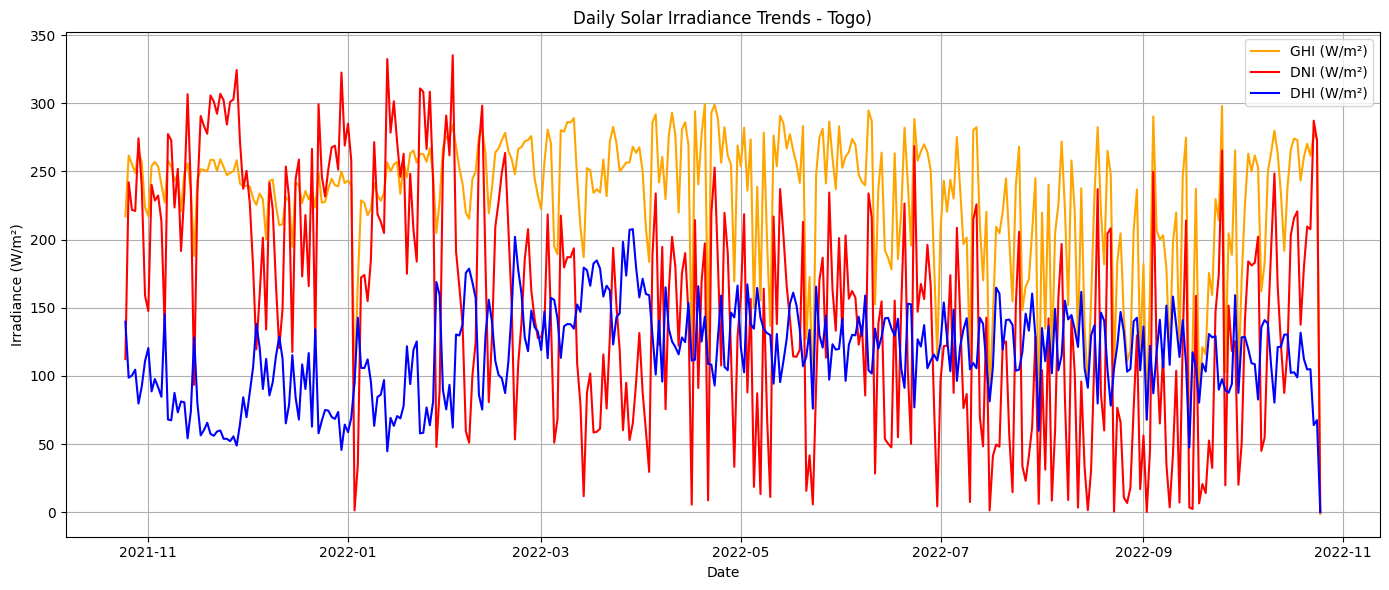

In [12]:
plt.figure(figsize=(14, 6))
plt.plot(df_daily.index, df_daily['GHI'], label='GHI (W/m²)', color='orange')
plt.plot(df_daily.index, df_daily['DNI'], label='DNI (W/m²)', color='red')
plt.plot(df_daily.index, df_daily['DHI'], label='DHI (W/m²)', color='blue')
plt.title('Daily Solar Irradiance Trends - Togo)')
plt.xlabel('Date')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

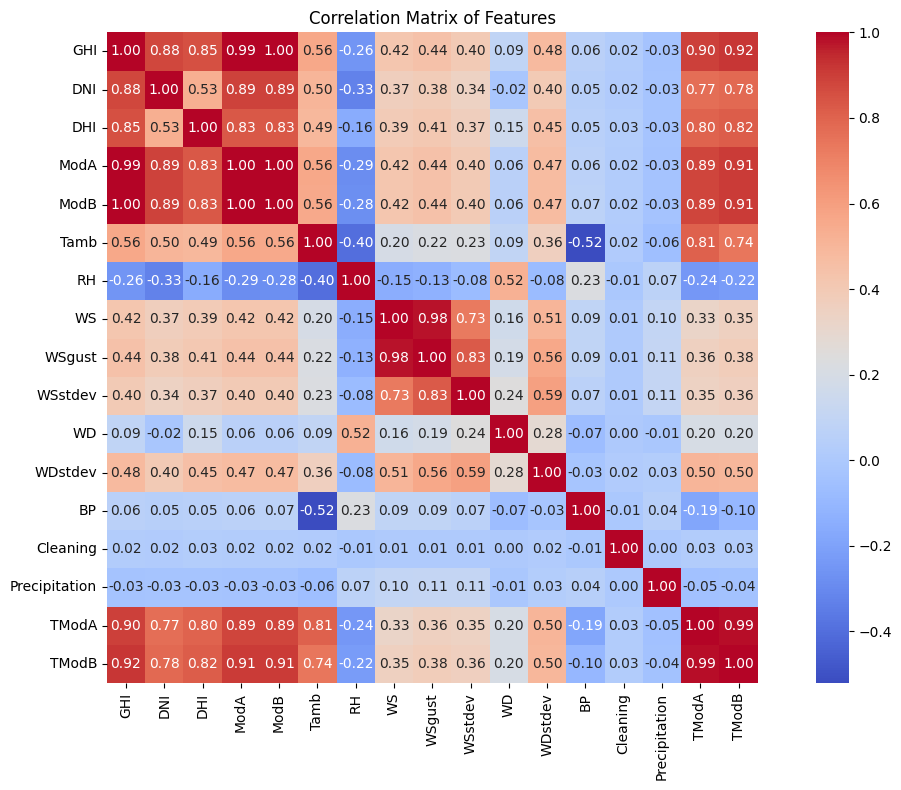

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

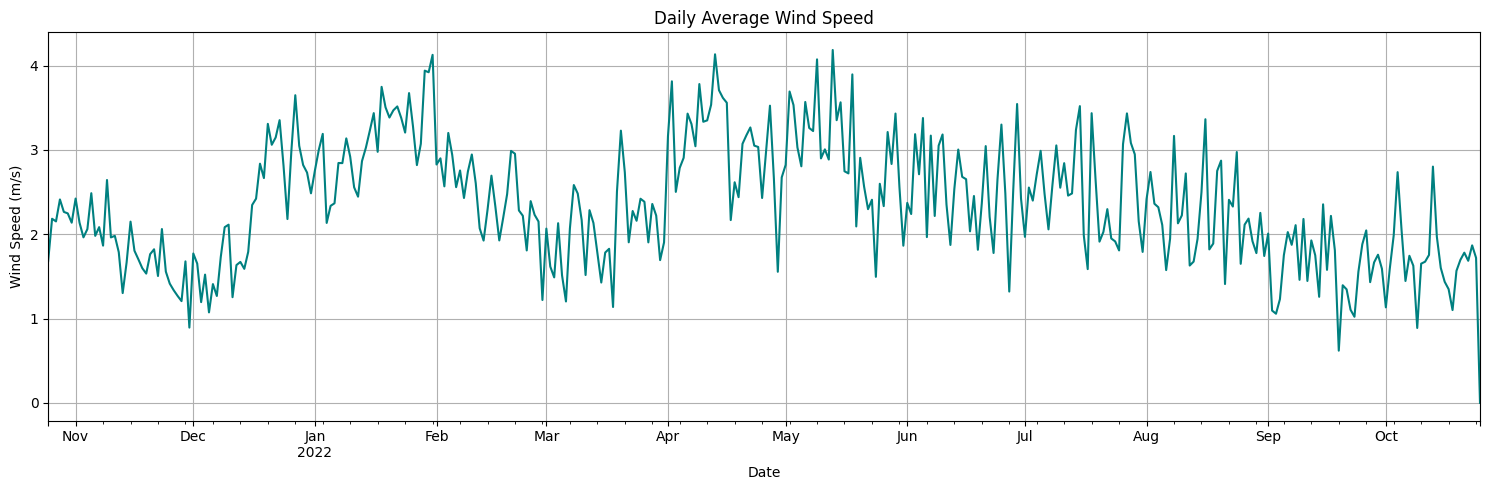

In [14]:
plt.figure(figsize=(15, 5))
df['WS'].resample('D').mean().plot(label='Wind Speed', color='teal')
plt.title("Daily Average Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

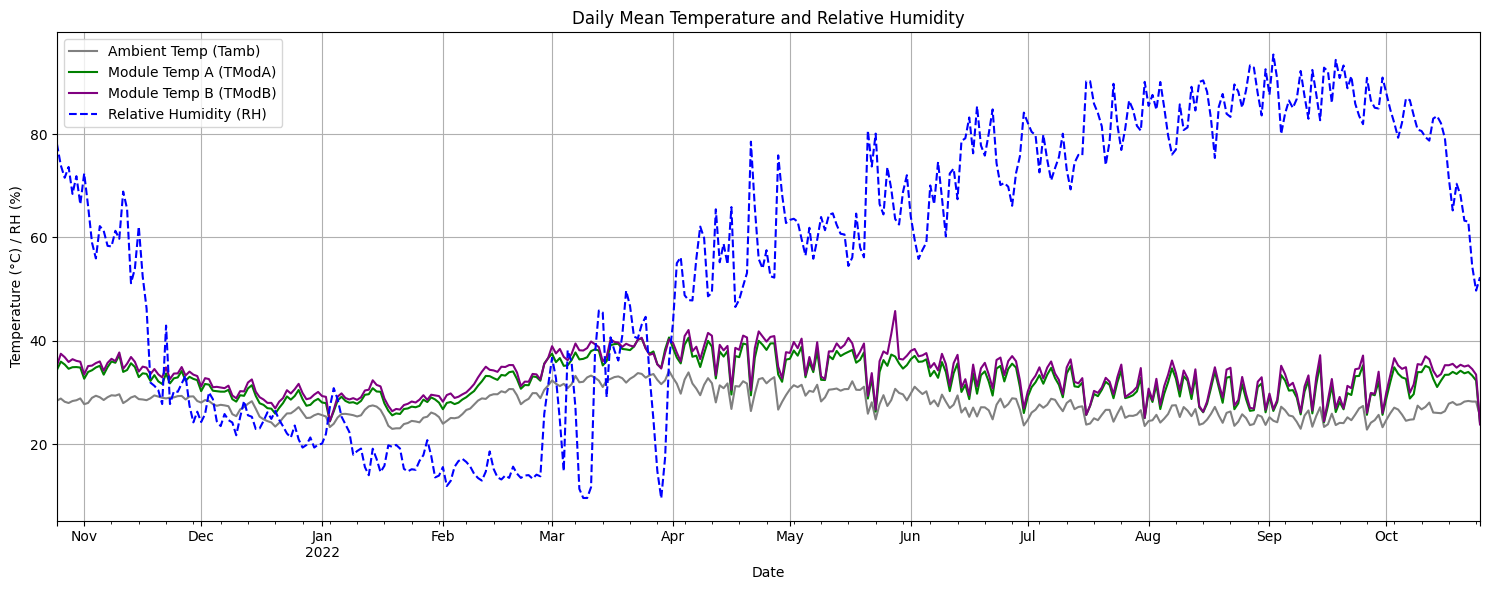

In [15]:
import matplotlib.pyplot as plt

# Temperature and RH over time (Daily mean)
plt.figure(figsize=(15, 6))

df['Tamb'].resample('D').mean().plot(label='Ambient Temp (Tamb)', color='gray')
df['TModA'].resample('D').mean().plot(label='Module Temp A (TModA)', color='green')
df['TModB'].resample('D').mean().plot(label='Module Temp B (TModB)', color='purple')
df['RH'].resample('D').mean().plot(label='Relative Humidity (RH)', color='blue', linestyle='--')

plt.title("Daily Mean Temperature and Relative Humidity")
plt.ylabel("Temperature (°C) / RH (%)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


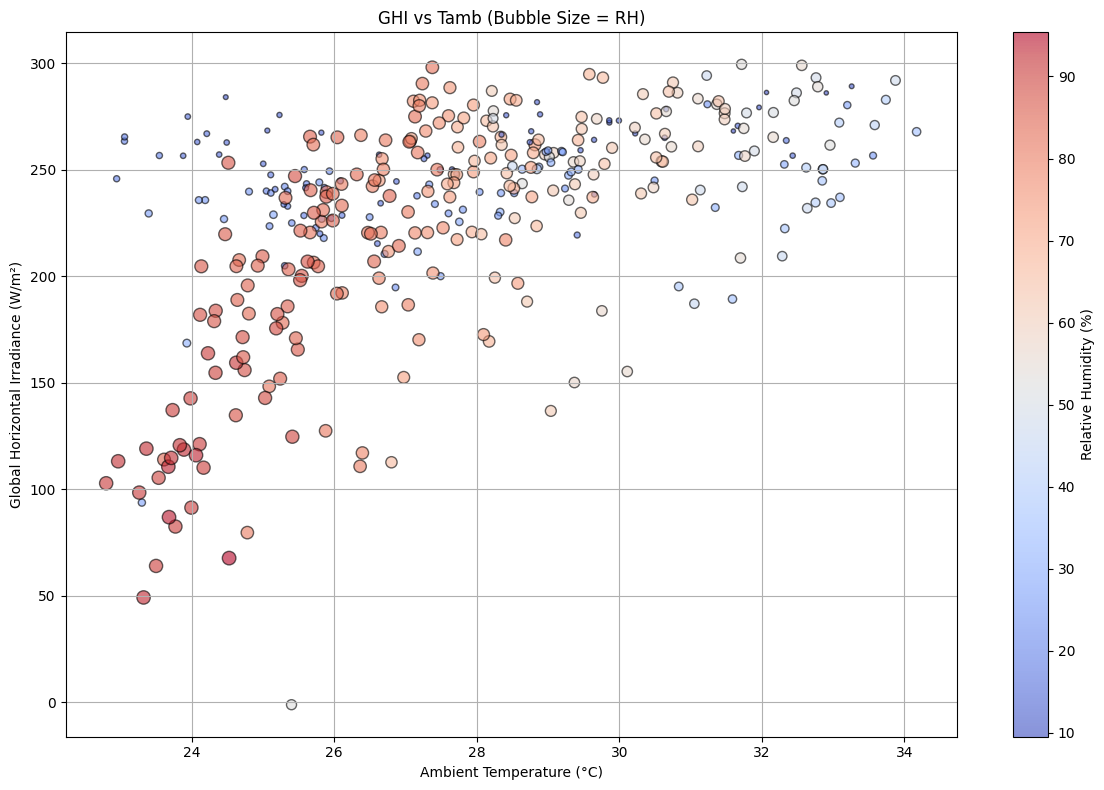

In [16]:
# Bubble Chart: GHI vs Tamb with bubble size = RH
plt.figure(figsize=(12, 8))

# Daily means to simplify and smooth the data
bubble_data = df[['GHI', 'Tamb', 'RH']].resample('D').mean().dropna()

plt.scatter(
    x=bubble_data['Tamb'],
    y=bubble_data['GHI'],
    s=bubble_data['RH'],          # Bubble size = RH
    c=bubble_data['RH'],          # Optional: color by RH
    cmap='coolwarm',
    alpha=0.6,
    edgecolors='black'
)

plt.title("GHI vs Tamb (Bubble Size = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.colorbar(label="Relative Humidity (%)")
plt.grid(True)
plt.tight_layout()
plt.show()
